In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
IMG_SIZE=200
BATCH_SIZE=32

In [30]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [31]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/INTERNSHIP/Madhu/Face_Recognition/TRAIN',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='training')


Found 275 images belonging to 3 classes.


In [32]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/INTERNSHIP/Madhu/Face_Recognition/TRAIN',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='validation')


Found 30 images belonging to 3 classes.


In [33]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("Class names:",class_names)


Class indices: {'ABHILASH': 0, 'ABIJAI': 1, 'MADHU': 2}
Class names: ['ABHILASH', 'ABIJAI', 'MADHU']


In [34]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,899 (33.42 MB)

 Trainable params: 8,760,899 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(train_generator,epochs=7,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3449 - loss: 1.8757 - val_accuracy: 0.7000 - val_loss: 0.8609
Epoch 2/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7130 - loss: 0.7604 - val_accuracy: 0.7000 - val_loss: 0.5337
Epoch 3/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8213 - loss: 0.4251 - val_accuracy: 0.9000 - val_loss: 0.3212
Epoch 4/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9124 - loss: 0.2476 - val_accuracy: 0.9333 - val_loss: 0.2536
Epoch 5/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9600 - loss: 0.1061 - val_accuracy: 0.9333 - val_loss: 0.2234
Epoch 6/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9805 - loss: 0.0690 - val_accuracy: 0.9000 - val_loss: 0.1960
Epoch 7/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9859 - loss: 0.0501 - val_accuracy: 0.9667 - val_loss: 0.0715


In [39]:
model.save('/content/drive/MyDrive/INTERNSHIP/Madhu/Face_Recognition/Face_Recognition.h5')

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/INTERNSHIP/Madhu/Face_Recognition/Face_Recognition.h5')
print("Model Loaded")

Model Loaded


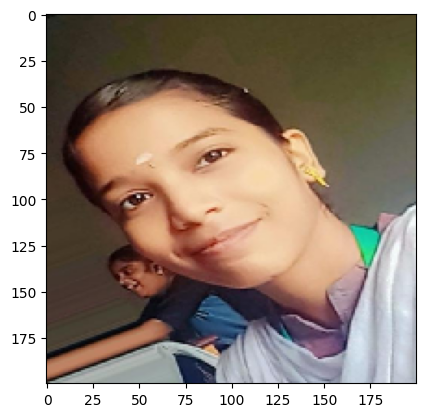

In [41]:
test_image_path='/content/drive/MyDrive/INTERNSHIP/Madhu/Face_Recognition/TRAIN/MADHU/aug_0_8197.jpg'
plt.imshow(img)
plt.axis()
plt.show()

In [42]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [43]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
MADHU
